In [ ]:
using CRCBS
using LightGraphs, MetaGraphs
G = initialize_full_grid_graph_CT()
starts = [1,5,8,12]
goals = [4,1,2,25]
lambda = 0.5
epsilon = 0.1
t_delay = 0.5
mapf = MAPF(G,starts,goals,lambda,epsilon,t_delay)

In [ ]:
CTCBS(mapf)

In [ ]:
using JLD
jldopen("../experiments/5test.jld","w") do file
    addrequire(file,CRCBS)
    write(file,"data",1)
end

In [1]:
using CRCBS
using Distributions
using HCubature

┌ Info: Recompiling stale cache file /home/peltzer/.julia/compiled/v1.0/CRCBS/26Ksw.ji for CRCBS [edef75b8-3ac4-11e9-0392-bf149c536ee3]
└ @ Base loading.jl:1190
┌ Warning: Package CRCBS does not have JLD in its dependencies:
│ - If you have CRCBS checked out for development and have
│   added JLD as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with CRCBS
└ Loading JLD into CRCBS from project dependency, future warnings for CRCBS are suppressed.
┌ Warning: Replacing docs for `CRCBS.get_dist_matrix :: Tuple{LightGraphs.AbstractGraph}` in module `CRCBS`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `CRCBS.pad_matrix :: Union{Tuple{T}, Tuple{Array{T,2},Tuple{Int64,Int64},T}} where T` in module `CRCBS`
└ @ Base.Docs docs/Docs.jl:223


In [2]:
name = "Debugging_test_1"
sub_name="Debugging_test_1_CBS"
st = run_cbs_particles(name; type="CBS", sub_name="", save_simulation=true)

llsolution
5
Array{LightGraphs.SimpleGraphs.SimpleEdge,1}[[Edge 37 => 48, Edge 48 => 59, Edge 59 => 70, Edge 70 => 81, Edge 81 => 82, Edge 82 => 93, Edge 93 => 104, Edge 104 => 115, Edge 115 => 116, Edge 116 => 117], [Edge 54 => 43, Edge 43 => 32, Edge 32 => 21, Edge 21 => 20, Edge 20 => 19, Edge 19 => 8, Edge 8 => 7, Edge 7 => 6, Edge 6 => 5], [Edge 112 => 113, Edge 113 => 102, Edge 102 => 103, Edge 103 => 104, Edge 104 => 105, Edge 105 => 106, Edge 106 => 95, Edge 95 => 84, Edge 84 => 73, Edge 73 => 74, Edge 74 => 75], [Edge 65 => 64, Edge 64 => 75, Edge 75 => 86, Edge 86 => 97, Edge 97 => 108, Edge 108 => 107, Edge 107 => 118], [Edge 97 => 96, Edge 96 => 95, Edge 95 => 94, Edge 94 => 83, Edge 83 => 72, Edge 72 => 71, Edge 71 => 70, Edge 70 => 69, Edge 69 => 68, Edge 68 => 57, Edge 57 => 56]]


5-element Array{Array{Float64,3},1}:
 [0.0 0.126065; 1.12607 2.48373; … ; 18.2087 19.8616; 20.8616 21.091]

[0.0 2.58792; 3.58792 4.39999; … ; 20.2712 21.147; 22.147 23.0704]

[0.0 0.0929099; 1.09291 1.12258; … ; 19.2322 19.3651; 20.3651 20.4782]

...

[0.0 0.35962; 1.35962 1.93902; … ; 15.5187 15.593; 16.593 18.6787]

[0.0 0.93841; 1.93841 2.12659; … ; 20.1179 20.546; 21.546 21.7299]

[0.0 0.182641; 1.18264 4.12181; … ; 23.5431 27.1476; 28.1476 29.4544]    
 [0.0 1.3956; 2.3956 2.55064; … ; 16.2061 16.7923; 17.7923 18.6756]

[0.0 0.414384; 1.41438 1.68725; … ; 11.9793 12.2461; 13.2461 13.6935]

[0.0 0.361702; 1.3617 1.64401; … ; 14.8533 15.5474; 16.5474 18.13]

...

[0.0 1.77216; 2.77216 3.50604; … ; 19.2015 19.326; 20.326 22.0551]

[0.0 1.2815; 2.2815 3.01132; … ; 15.4225 15.7748; 16.7748 17.0268]

[0.0 1.45729; 2.45729 3.17165; … ; 17.8421 17.9391; 18.9391 20.0143]        
 [0.0 2.03725; 3.03725 3.23887; … ; 23.0396 23.5212; 24.5212 24.6603]

[0.0 1.37919; 2.37919 2.51307; … ; 22.72

In [10]:
size(st[6])

(12, 2, 20)

In [ ]:
name = "Debugging_test"
num_agents = tuple(5)
grid_x = tuple(10)
grid_y = tuple(10)
filling_density = tuple(1.0)
lambda = 0.2
epsilon = 0.2
t_delay = 1.0
max_num_experiments = 1
num_trials = 2000

data = run_experiment_set_CRCBS(name,num_agents,grid_x,grid_y,filling_density,lambda,epsilon,t_delay,max_num_experiments,num_trials)

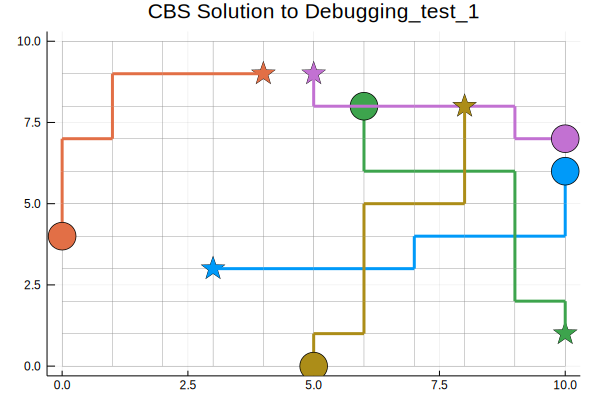

In [3]:
subname = "Debugging_test_1"
plot_optimal_nominal_paths(subname;type="CBS",graphfilename = "Debugging_test_1")

In [ ]:
subname = "Debugging_test_1"
plot_optimal_nominal_paths(subname;type="CBS",graphfilename ="")

In [3]:
subname = "Debugging_test_1"
plot_simulations(subname;type="CBS",graphfilename = "Debugging_test_1",timehorizon=40,num_particles = 20)

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0], Any[4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0], Any[5.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0], Any[8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 8.0, 9.0, 10.0

In [ ]:
using CRCBS
subname = "Debugging_test_1_optimal_2"
savedir= "Dbg1/CRCBS_optimal_2/"
run_problem("Debugging_test_1";optimal=true, sub_name=subname, save_simulation=true,lambda=1.0,epsilon=0.001,t_delay=1.0)
plot_optimal_nominal_paths(subname;type="CRCBS",graphfilename = "Debugging_test_1",savedir=savedir)
plot_simulations(subname;type="CRCBS",graphfilename = "Debugging_test_1",timehorizon=40,num_particles = 20,savedir=savedir)

ASTAR: 5

 
Agents 5 and 1 conflict at node 84
ASTAR: 1
ASTAR: 1
Agents 3 and 5 conflict at node 95
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 95
ASTAR: 1
ASTAR: 1
Agents 4 and 3 conflict at node 97
ASTAR: 1
ASTAR: 1
Agents 4 and 5 conflict at node 97
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 106
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1

 
Agents 3 and 5 conflict at node 95
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 95
ASTAR: 1
ASTAR: 1
Agents 4 and 3 conflict at node 97
ASTAR: 1
ASTAR: 1
Agents 4 and 5 conflict at node 97
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 106
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1

 
Agents 3 and 5 conflict at node 83
ASTAR: 1
ASTAR: 1
Agents 3 and 5 conflict at node 84
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 84
ASTAR: 1
ASTAR: 1
Agents 5 and 1 conflict at node 84
ASTAR: 1
ASTAR: 1
Agent

ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1

 
Agents 3 and 5 conflict at node 83
ASTAR: 1
ASTAR: 1
Agents 3 and 5 conflict at node 84
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 84
ASTAR: 1
ASTAR: 1
Agents 5 and 1 conflict at node 84
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1

 
Agents 5 and 1 conflict at node 70
ASTAR: 1
ASTAR: 1
Agents 3 and 5 conflict at node 95
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 103
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 104
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1

 
Agents 5 and 1 conflict at node 70
ASTAR: 1
ASTAR: 1
Agents 3 and 5 conflict at node 95
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 103
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 104
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1

 
Agents 5 and 1 conflict at node 70
ASTAR: 1
ASTAR: 1
Agents 3 and 5 conflict at node 83
ASTAR: 1
ASTAR: 1
Agents 3 and 5 conflict at node 84
ASTAR: 1
ASTAR: 1
Agents 3 


 
Agents 5 and 1 conflict at node 71
ASTAR: 1
ASTAR: 1
Agents 5 and 1 conflict at node 82
ASTAR: 1
ASTAR: 1
Agents 5 and 1 conflict at node 83
ASTAR: 1
ASTAR: 1
Agents 3 and 5 conflict at node 95
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 105
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1

 
Agents 5 and 1 conflict at node 71
ASTAR: 1
ASTAR: 1
Agents 5 and 1 conflict at node 82
ASTAR: 1
ASTAR: 1
Agents 5 and 1 conflict at node 83
ASTAR: 1
ASTAR: 1
Agents 3 and 5 conflict at node 95
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 105
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1

 
Agents 3 and 5 conflict at node 95
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 95
ASTAR: 1
ASTAR: 1
Agents 3 and 1 conflict at node 106
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1
ASTAR: 1

 
Agents 5 and 1 conflict at node 70
ASTAR: 1
ASTAR: 1
Agents 3 and 5 conflict at node 83
ASTAR: 1
ASTAR: 1
Agents 3 a

In [1]:
using CRCBS
subname = "Debugging_test_1_sim1"
graphfilename = "Debugging_test_1"
plot_simulations(subname;type="CRCBS",graphfilename=graphfilename,timehorizon=30,num_particles = 20)

┌ Info: Recompiling stale cache file /home/peltzer/.julia/compiled/v1.0/CRCBS/26Ksw.ji for CRCBS [edef75b8-3ac4-11e9-0392-bf149c536ee3]
└ @ Base loading.jl:1190
┌ Warning: Package CRCBS does not have JLD in its dependencies:
│ - If you have CRCBS checked out for development and have
│   added JLD as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with CRCBS
└ Loading JLD into CRCBS from project dependency, future warnings for CRCBS are suppressed.
┌ Warning: Replacing docs for `CRCBS.get_dist_matrix :: Tuple{LightGraphs.AbstractGraph}` in module `CRCBS`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `CRCBS.pad_matrix :: Union{Tuple{T}, Tuple{Array{T,2},Tuple{Int64,Int64},T}} where T` in module `CRCBS`
└ @ Base.Docs docs/Docs.jl:223


llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.

llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.

llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.

llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.

llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.

llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.

llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.

llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.

llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.

llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.

llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Any[4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0], Any[10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0], Any[5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0], Any[8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0]]
llsolutionx
Any[Any[3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.

In [ ]:
using CRCBS
using Distributions
using HCubature

name = "Convergence_test"
num_agents = (3,8,10)
grid_x = tuple(10)
grid_y = tuple(10)
filling_density = tuple(0.8)
lambda = 0.2
epsilon = 0.9
t_delay = 0.5
max_num_experiments = 3
num_trials = 1000

data2 = run_convergence_tests_CRCBS(name,num_agents,grid_x,grid_y,filling_density,lambda,epsilon,t_delay,max_num_experiments,num_trials)

In [ ]:
exp_set.data[2].solving_time

In [ ]:
save_experiment_set(exp_set)

In [ ]:
n1 = 17.0
t1 = 17.0
n2 = 17.0
t2 = 17.0
nn = 1.0
lambda = 0.2
y = 0.0
t = 400.0

In [ ]:
get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)

In [ ]:
(1-cdf(Gamma(nn,lambda),abs(t2-t1+y)))

In [ ]:
pdf(Gamma(n1,lambda), t+y)

In [ ]:
using HCubature
function get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)

    function f(x)
        y = x[1]
        t = x[2]
        density = (1-cdf(Gamma(nn,lambda),abs(t2-t1+y))) * pdf(Gamma(n1,lambda), t) * pdf(Gamma(n2,lambda),t-y)
        return density
    end

    function g(x)
        y = x[1]
        t = x[2]
        density = (1-cdf(Gamma(nn,lambda),abs(t2-t1+y))) * pdf(Gamma(n1,lambda), t+y) * pdf(Gamma(n2,lambda),t)
        return density
    end
    
    function h(x)
        y = x[1]
        t = x[2]
        density = (1-cdf(Gamma(nn,lambda),abs(t2-t1-y))) * pdf(Gamma(n1,lambda), t) * pdf(Gamma(n2,lambda),t-y)
        return density
    end

    a = [-100.0;0.0]
    b = [0.0,100.0]
    m = [0.0;0.0]
    n = [100.0,100.0]
    
    bound = max(t1+n1,t2+n2)*lambda + 30.0
    #bound = 20.0 
    
    o = bound.*[-1.0,-1.0]
    p = bound.*[1.0,1.0]
    # C1,err1 = hcubature(f,a,b,maxevals=10^7)
    # C2,err2 = hcubature(g,m,n,maxevals=10^7)
    # C = C1 + C2
    # err = err1 + err2
    C, err = hcubature(h,o,p,maxevals=10^8)
    #C, err = hcubature(h,o,p,rtol = 10^(-3))

    return C, err
end

In [ ]:
using Distributions
function count_conflicts(n1,t1,n2,t2,nn,lambda,num_particles)
    EA1 = rand(Gamma(n1,lambda),num_particles)
    EA2 = rand(Gamma(n2,lambda),num_particles)
    ed1 = rand(Gamma(nn,lambda),num_particles)
    ed2 = rand(Gamma(nn,lambda),num_particles)
    
    r1_arrivals = t1 .+ EA1
    r1_departures = r1_arrivals + ed1
    r2_arrivals = t2 .+ EA2
    r2_departures = r2_arrivals + ed2
    
    num_conflicts =length(findall(((r2_departures-r1_arrivals).>0) .& ((r1_departures-r2_arrivals).>0)   ))
    
    return num_conflicts/num_particles
end

In [ ]:
n1 = rand(1:50)
t1 = rand()*50
n2 = rand(1:50)
t2 = rand()*50
nn = rand(1:5)
lambda = rand()
print("n1: ", n1, " t1: ", t1, " n2: ", n2, " t2: ", t2, " nn: ", nn, " lambda: ", lambda)
sleep(1)
theoretical_cp = get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)
count_conflicts(n1,t1,n2,t2,nn,lambda,10000)

In [ ]:
theoretical_cp

In [ ]:
get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)

In [ ]:
get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)

In [ ]:
n1= 55
t1= 6.7
n2= 13 
t2= 13.23
nn= 46
lambda= 0.08
theoretical_cp = get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)
experimental_cp = count_conflicts(n1,t1,n2,t2,nn,lambda,2000000)

In [ ]:
using DataFrames
using Statistics
using Plots
df = DataFrame(num_particles=Int64[],cp=Float64[],experimental_cp=Float64[],etas=Float64[])
x_list = [1,2,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]
max_attempts = 10000
# Defining global variables
n1 = 0
n2 = 0
t1 = 0
t2 = 0
nn = 0
lambda = 0
for k in 1:200
    #println("Next k")
    theoretical_cp = 0.0
    attempts = 0
    while theoretical_cp < 0.01 && attempts < max_attempts
        n1 = rand(1:20)
        t1 = rand()*20
        n2 = rand(1:20)
        t2 = rand()*20
        nn = rand(1:5)
        lambda = rand()
        theoretical_cp = get_collision_probability_node2(n1,t1,n2,t2,nn,lambda)[1]
        attempts += 1
    end
    for x in x_list
        experimental_cp = count_conflicts(n1,t1,n2,t2,nn,lambda,x)
        ecart_relatif = abs(experimental_cp-theoretical_cp)/theoretical_cp
        if abs(ecart_relatif) > 0.5 && x > 2000
            println("Exception case occured! Returned something really wrong.")
            println("n1: ", n1, " t1: ", t1, " n2: ", n2, " t2: ", t2, " nn: ", nn, " lambda: ", lambda)
        end
        push!(df,[x,theoretical_cp,experimental_cp,ecart_relatif])
    end
end

ys = []
stds = []
for x in x_list
    indexes = findall((df[1].==x) .& (df[2] .> 0.01) .& (df[2] .< 1.0) .& (df[3] .> 0.01))
    values = df[4][indexes]
    y = mean(values)
    stdv = std(values)
    append!(ys,y)
    append!(stds,stdv)
end

plot(x_list,ys,yerror=stds,xscale = :log10)

In [ ]:
plot(x_list,ys,yerror=stds,xscale = :log10,xlabel="Number of particles per simulation", ylabel="Relative error")

In [ ]:
df[4]

In [ ]:
df[4]

In [ ]:
indexes = findall(df[1].==1)
df[1][indexes]

In [ ]:
using Random
typeof(shuffle(collect((1,2,3)))[1:end])

In [ ]:
using LightGraphs, MetaGraphs
#using Iterators

v = Vector{Edge}()
for k in 1:5
    push!(v,Edge(k,k+1))
end

In [ ]:
typeof(v)

In [ ]:
eltype(MetaGraph())

In [ ]:
using JLD
save_experiment_set(exp_set)

In [ ]:
plot_SVtime_vs_nrobots(["results/003Experiment_Set_001.jld"])

In [ ]:
using JLD
exp_s = load("results/001Experiment_Set_001.jld")

In [ ]:
data = Vector{}()

In [ ]:
using Pkg
Pkg.add("DataFrames")

In [ ]:
using DataFrames
thing = DataFrame(A=String[])

In [ ]:
myvector = Vector{}([1.0,2.0])
mytuple = (1,2,3)

In [ ]:
thing = DataFrame(a=String[],b=Vector{Float64}[],c = Tuple{Float64,Float64}[])

In [ ]:
push!(thing, ["M", myvector,(1.0,3.0)])

In [ ]:
string(name,"1")

In [ ]:
string('i',string(1))

In [ ]:
string(1)

In [ ]:
using LightGraphs, MetaGraphs

In [ ]:
rand()

In [ ]:
elt = [v for v in vertices(g)]

In [ ]:
function dostuff!(a,b,c=0)
    a[1] = 5
    b[1] = 2
    c = c+5
end

In [ ]:
a = [1,2]
b = [-4]
c = 13
dostuff!(a,b,c)
println(a)
println(b)
println(c)

In [ ]:
using CSV
using DataFrames

In [ ]:
CSV.write("5test.csv",data)

In [ ]:
retrieved_data = DataFrame(CSV.File("5test.csv"))

In [ ]:
mylist = retrieved_data.probability_error[1]

In [ ]:
[parse(Float64, ss[1:end-1]) for ss in split(mylist[2:end])]

In [ ]:
num_trials = 100000
range(1,stop=num_trials,length=10)

In [ ]:
maximum(data2[1])

In [ ]:
idxs = findall(data2[2].==0.0)

In [ ]:
max(1,2)

In [ ]:
TA = zeros(Float64,1,2,3)

In [ ]:
size(TA)

In [ ]:
TA[1,1,1]